<h1 align='center'> Monte-Carlo (MCMC) - TP6 (Homework due April 28 23h59) </h1>
<h4 align='right'><i> author: Hicham Janati </i></h4>


In [161]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import quad

## I - Metropolis-Hastings vs Rejection sampling
We would like to sample from the density function:
$$ f(x) \propto  x^4\exp(- x^2) $$ 
Using the proposal: $g(x) \propto \exp(- \frac{1}{2} x^2) $.

1. Find an empirical bound M so as to apply rejection sampling using g to sample from f and visualize the domination of f by Mg.

In [162]:
x = np.linspace(-10, 10, 1000)
f = lambda x: np.exp(- x ** 2) * x ** 4
g = lambda x: np.exp(- 0.5 * x ** 2)



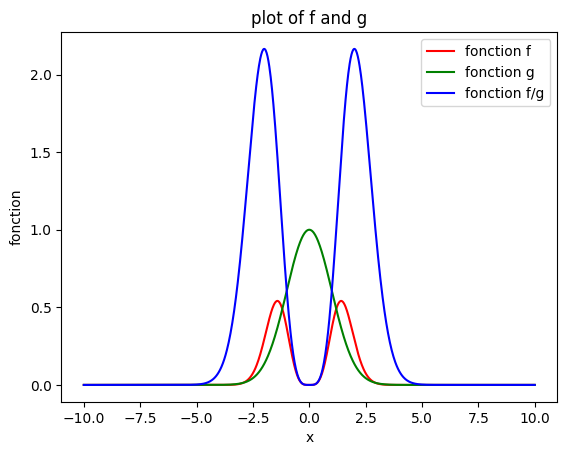

In [163]:
plt.plot(x, f(x), label= "fonction f", color = 'red')
plt.plot(x, g(x) , label= "fonction g", color = "green")
plt.plot(x, f(x)/g(x) , label= "fonction f/g", color = "blue")

plt.xlabel('x')
plt.ylabel('fonction')
plt.title('plot of f and g')
plt.legend()
#plt.grid(True)
plt.show()

As we can see from the plot, we can choose M=3, the we would have, for all $ x, f(x) \leq Mg(x)$

2. Implement the rejection sampling algorithm and visualize the empirical histogram against the density f. Use scipy.integration to estimate the normalizing constant of f for accurate visualization of the density.

**The reject sampling algorithm consists in:**

**-Generate $X_i$ following density $g$ and $U_i ~ U[0;1]$**

**-if $U_i \leq \alpha (X_i) = \frac{f(X_i)}{Mg(X_i)}$, then accept the sample $X_i$**

In [164]:
M=3
G, _ =  quad(g, -np.inf,np.inf)
g_normalized = lambda x : g(x)/G

In [165]:
def rejection_sampling(f,N,M):
    """Reject sampling algorithm for f with Gaussian proposal g."""
    X= []
    for k in range(N):
        U_i = np.random.uniform(0,1)
        X_i = np.random.normal()
        if U_i <= f(X_i)/(M*g(X_i)):
            X.append(X_i)
    return X



In [166]:
F, _ =  quad(f, -np.inf,np.inf)
f_normalized = lambda x : f(x)/F
X = rejection_sampling(f_normalized,100000,M)

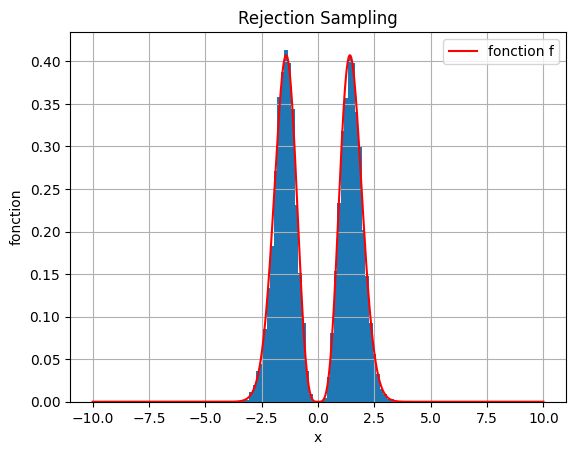

In [167]:
plt.hist(X, bins=50, density=True)
plt.plot(x, f_normalized(x), label= "fonction f", color = 'red')
plt.xlabel('x')
plt.ylabel('fonction')
plt.title('Rejection Sampling')
plt.legend()
plt.grid(True)
plt.show()

3. Implement the random walk metropolis hastings algorithm with a Gaussian conditional probability and visualize the empirical histogram against the normalized density f/F

In [168]:
def rw_metropolis_hastings(n, f=f, seed=None):
    """Random walk metropolis hastings algorithm for f with Gaussian proposal g.
    n: int.
        number of samples.
    f: callable.
        density we want to sample from.
    seed: int (optional).
        random seed initialization.

    Returns:
        list: List of generated samples.
    
    """
    X = [0]  # Initial value
    for i in range(n):
        if seed is not None:
            np.random.seed(seed)
        Y = X[-1] + np.random.normal()  #  Gaussian random variable centered at X[-1]
        
        # Calculate the acceptance probability
        rho = min(1, f(Y) / f(X[-1]))
        
        # Accept the new sample with probability rho
        if np.random.uniform() < rho:
            X.append(Y)
        else:
            X.append(X[-1])
    
    return X[1:]  # Remove the initial value

In [169]:
X = rw_metropolis_hastings(100000,f_normalized)

C:\Users\dell\AppData\Local\Temp\ipykernel_12896\1105679118.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  rho = min(1, f(Y) / f(X[-1]))


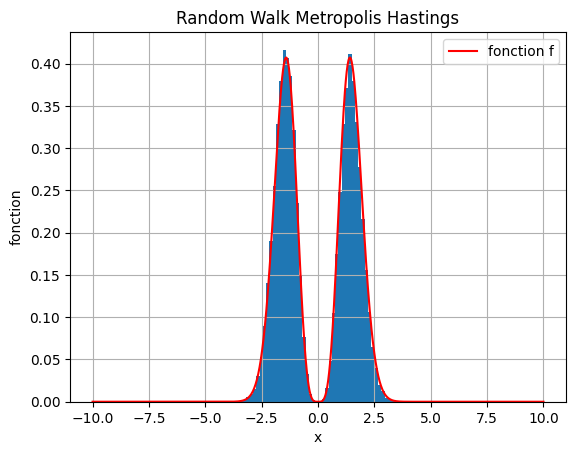

In [170]:
plt.hist(X, bins=50, density=True)
plt.plot(x, f_normalized(x), label= "fonction f", color = 'red')
plt.xlabel('x')
plt.ylabel('fonction')
plt.title('Random Walk Metropolis Hastings')
plt.legend()
plt.grid(True)
plt.show()

# II - Gibbs sampling
Gibbs sampling is a Markov Chain sampling algorithm used to sample from a multivariate random variable by sampling each component from its conditional distribution while the others components are fixed.

We would like to sample from a multivariate Gaussian $(X_1, X_2)$ with density:
$$p(x_1, x_2) = \frac{1}{2\pi\sqrt{1 - \rho^2}} \exp\left(- \frac{1}{2(1 - \rho^2)}(x_1^2 + x_2^2 - 2\rho x_1 x_2)\right) $$
*1. Identify the parameters of the distribution and compute the conditional distributions of each component.*

This is a multivariate Gaussian distribution $\mathcal{N}(\mu, \Sigma)$ with parameters:

Mean:
    $\mu = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $

Variance: 
    $\Sigma = \begin{pmatrix} 1 & \rho \\ \rho & 1 \end{pmatrix}$

The conditional distribution given $X_2$: 
    $p(x_1 | x_2) = \mathcal{N}(\rho x_2, 1 - \rho^2)$

The conditional distribution given $X_1$: 
    $p(x_2 | x_1) = \mathcal{N}(\rho x_1, 1 - \rho^2)$


*2. Implement the associated Gibbs sampler where each $X_1, X_2$ are sampled sequentially from the conditional distributions.*

In [171]:

def gibbs_sampler(n, rho):
    X = []
    X_1 = 0
    X_2 = 0
    for i in range(n):
        X_1 = np.random.normal(rho*X_2, 1 - rho**2)
        X_2 = np.random.normal(rho*X_1, 1 - rho**2)
        X.append((X_1, X_2))
    return np.array(X)


3. Visualize the contour plots of the target distribution and that of the Gibbs Sampler for different values of n. How does it behave with $\rho$ ?

First the target density:

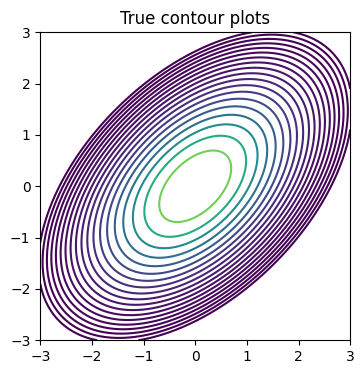

In [172]:
from scipy.stats import multivariate_normal
rho = 0.5
S = np.array([[1, rho], [rho, 1]])
grid = np.linspace(-3, 3, 1000)
x, y = np.meshgrid(grid, grid)
pos = np.empty((1000, 1000, 2))
pos[:, :, 0] = x
pos[:, :, 1] = y
Z_true = multivariate_normal.pdf(pos, mean=[0, 0], cov=S)
plt.figure(figsize=(4, 4))
plt.contour(x, y, Z_true, levels=np.logspace(-2, 0., 20) * Z_true.max())
plt.title("True contour plots")
plt.show()

Now we plot the contour plots as the Markov chain moves. Keep in mind that the Markov chain samples are correlated and therefore not iid ! We need to wait a whiler until the MC reaches the stationary distribution. We show this in the following plots:
First we plot everything till a certain iteration:

In [173]:
from scipy.stats import multivariate_normal

def plot_gibbs(N_samples, rhos):
    """
    Plot the results of Gibbs sampling for different correlation coefficients.
    
    Parameters:
        N_samples (int): Number of samples to generate for each correlation coefficient.
        rhos (list): List of correlation coefficients to consider.
    """
    # Create subplots for each correlation coefficient
    fig, axes = plt.subplots(1, len(rhos), figsize=(20, 4))
    
    # Iterate over each correlation coefficient and corresponding subplot
    for rho, ax in zip(rhos, axes):
        # Generate samples using Gibbs sampler for the current correlation coefficient
        samples = gibbs_sampler(N_samples, rho)
        
        # Compute the covariance matrix for the bivariate normal distribution
        covariance_matrix = np.array([[1, rho], [rho, 1]])
        
        # Create a grid for contour plotting
        grid = np.linspace(-3, 3, 1000)
        x, y = np.meshgrid(grid, grid)
        pos = np.empty((1000, 1000, 2))
        pos[:, :, 0] = x
        pos[:, :, 1] = y
        
        # Compute the true joint density values using the bivariate normal distribution
        true_density = multivariate_normal.pdf(pos, mean=[0, 0], cov=covariance_matrix)
        
        # Plot the 2D histogram of generated samples and overlay true density contours
        ax.hist2d(samples[:, 0], samples[:, 1], bins=75, density=True)
        ax.contour(x, y, true_density, levels=np.logspace(-2, 0., 20) * true_density.max())
        
        # Set title for the subplot
        ax.set_title(r"$\rho$" + f" = {rho}")
    
    # Show the plot
    plt.show()

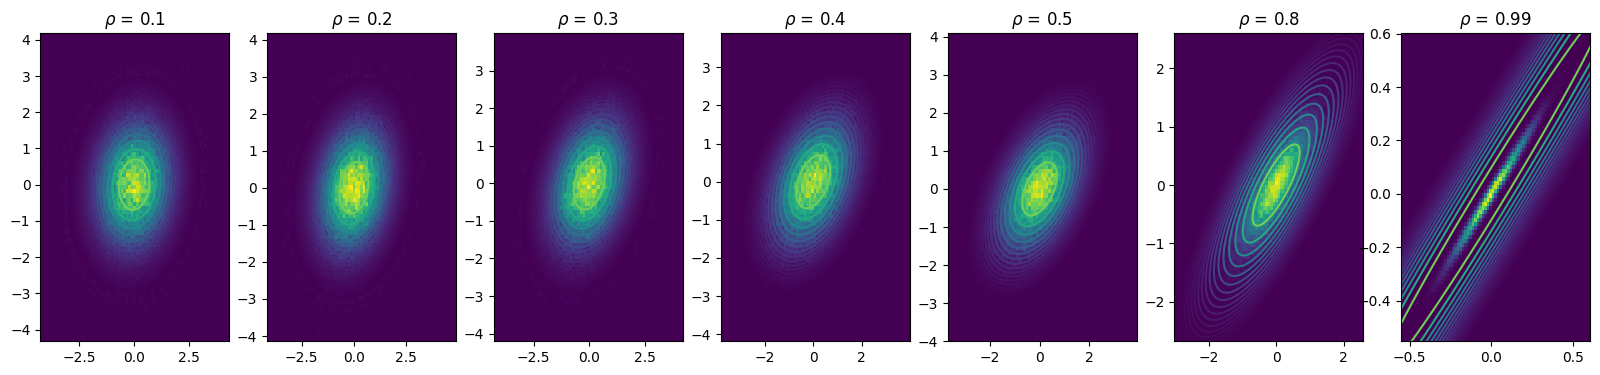

In [174]:
N = 100000
R = [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.99]
plot_gibbs(N, R)

4. Using the numpy corrcoef function, plot the auto-correlation values as a function of the lag: $corr(X_t, X_{t - lag})$

In [175]:
import numpy as np
import matplotlib.pyplot as plt

def plot_autocorrelation(X, M):
    """"
    Plot the auto-correlation values for each variable in X as a function of the lag.
    
    Parameters:
        X (array-like): Time series data with shape (n_samples, n_variables).
        M (int): Maximum lag to consider for auto-correlation calculation.
    """
    lag = np.arange(1, M + 1)
    n_variables = X.shape[1]
    
    for var_index in range(n_variables):
        autocorrelation = []
        X_var = X[:, var_index]
        for l in lag:
            X_var_lag = np.roll(X_var, l)[:-l]
            R = np.corrcoef(X_var[:-l], X_var_lag)
            autocorrelation.append(R[0, 1])
        plt.plot(lag, autocorrelation, label=f"$X_{var_index + 1}$")
    
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.grid()
    plt.title('Autocorrelation as a Function of Lag')
    plt.show()

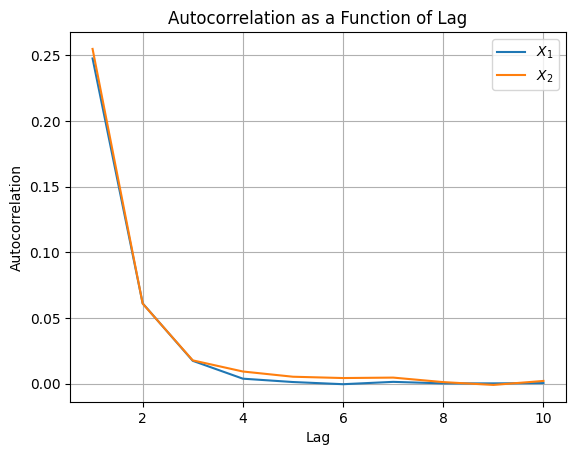

In [176]:
N = 100000
M = 10
rho = 0.5
X = gibbs_sampler(N, rho)
plot_autocorrelation(X, M)

5. Using what you observe, propose two arguments to add to your Gibbs sampler function to improve the simulation.
What happens when $\rho \to 1$ ?

As the lag parameter increases, the auto-correlation decreases towards zero. This can be justified by the fact, that by construction, two points that are sampled according to Gibbs sampling algorithm are less correlated if they are far from each other.

So the two arguments proposed to add in the Gibbs sampler function are :

-**Adaptive Lag Adjustment**:  In situations where the correlation between samples is stronger (e.g., $\rho \to 1$), it may be beneficial to adaptively adjust the lag parameter based on the correlation strength. By dynamically adjusting the lag parameter, the Gibbs sampler can effectively capture the correlation structure and improve the convergence rate.

**Auto-correlation Thresholding** :Rather than relying on a fixed lag parameter, we can introduce a threshold for auto-correlation values. If the auto-correlation between consecutive samples exceeds this threshold, the lag parameter is automatically adjusted to ensure that the correlation between samples decreases towards zero. This approach helps in handling situations where the correlation between samples is stronger than expected.



Here is a new Gibbs sampler, incorporating these changes:

In [177]:
def gibbs_sampler(n, rho, adaptive_lag=False, auto_corr_threshold=0.1):
    """
    Gibbs sampler for generating samples from a bivariate normal distribution with correlation rho.

    Parameters:
        n (int): Number of samples to generate.
        rho (float): Correlation coefficient.
        adaptive_lag (bool): Whether to use adaptive lag adjustment based on auto-correlation.
        auto_corr_threshold (float): Threshold for auto-correlation values to trigger lag adjustment.

    Returns:
        np.array: Generated samples of shape (n, 2).
    """
    X = []
    X_1 = 0
    X_2 = 0
    prev_X_1 = 0  # Store the previous value of X_1 for auto-correlation calculation
    for i in range(n):
        X_1 = np.random.normal(rho * X_2, np.sqrt(1 - rho**2))
        X_2 = np.random.normal(rho * X_1, np.sqrt(1 - rho**2))
        
        if adaptive_lag and i > 0:
            auto_corr = np.corrcoef(np.array([[prev_X_1], [X_1]]))[0, 1]
            if auto_corr > auto_corr_threshold:
                continue
        
        X.append((X_1, X_2))
        prev_X_1 = X_1  # Update previous X_1 for next iteration
    
    return np.array(X)


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


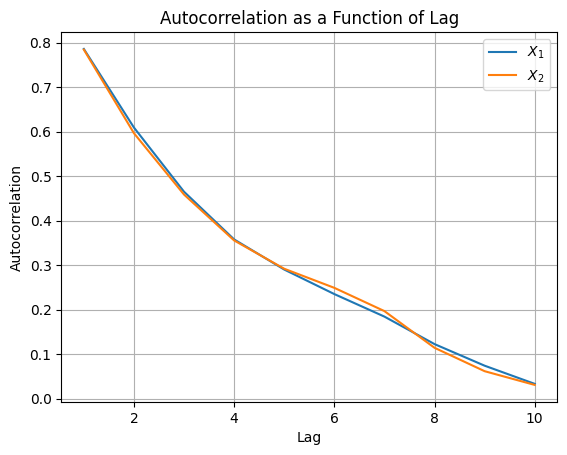

In [178]:
# Example usage:
samples = gibbs_sampler(n=1000, rho=0.9, adaptive_lag=True, auto_corr_threshold=0.1)
plot_autocorrelation(samples, M)

Let's see what happens when $\rho \to 1$

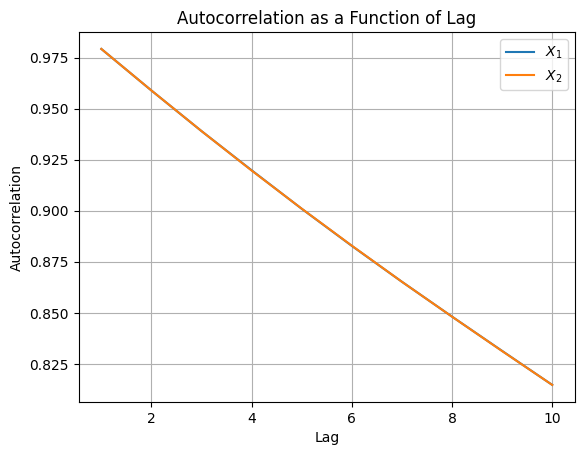

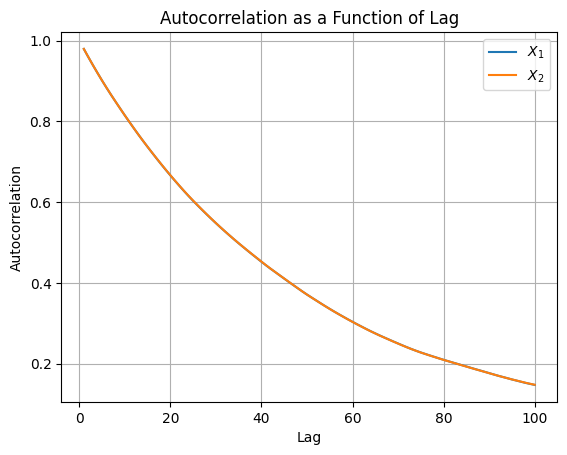

In [179]:
N = 100000
M = 10
rho = 0.99
X = gibbs_sampler(N, rho)
plot_autocorrelation(X, M)
plot_autocorrelation(X, M*10)

We notice that for $\rho$ very close to 1, the autocorrelation is very high, and it doesn't approach zero until we go far in the samples.

6. Implement a Random Walk metropolis algorithm to simulate from p using a conditional proposal $\mathcal N(0, \tau I_2)$ and vary $\tau$. 

In [180]:
def rw_metropolis_hastings(n, f, tau=1., seed=None):
    """
    Random walk Metropolis-Hastings algorithm for sampling from a target distribution f with a Gaussian proposal g.

    Parameters:
        n (int): Number of samples to generate.
        f (function): Target distribution.
        tau (float): Standard deviation parameter for the Gaussian proposal distribution.
        seed (int): Seed for reproducible random numbers.

    Returns:
        np.array: Generated samples.
    """
    if seed is not None:
        np.random.seed(seed)

    # Initialize samples array and initial state
    samples = []
    x_current = np.random.randn()

    # Generate samples
    for i in range(n):
        # Propose a new state from the Gaussian proposal distribution
        x_proposed = x_current + np.random.normal(scale=tau)

        # Calculate acceptance probability
        alpha = min(1, f(x_proposed) / f(x_current))

        # Accept or reject the proposed state based on acceptance probability
        if np.random.rand() < alpha:
            x_current = x_proposed

        # Add accepted sample to the samples array
        samples.append(x_current)

    return np.array(samples)

In [181]:
F, _ =  quad(f, -np.inf,np.inf)
f_normalized = lambda x : f(x)/F
X = rw_metropolis_hastings(10000, f, tau=1., seed=None)

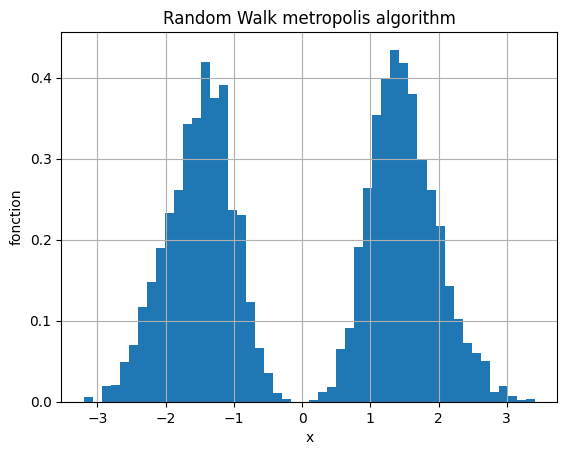

In [183]:
plt.hist(X, bins=50, density=True)
plt.plot(x, f_normalized(x), label= "fonction f", color = 'red')
plt.xlabel('x')
plt.ylabel('fonction')
plt.title('Random Walk metropolis algorithm')
#plt.legend()
plt.grid(True)
plt.show()